In [11]:
import time
import random
import matplotlib.pyplot as plt
from blockalignment import BlockAlignment
random.seed(10)

In [12]:
def global_align(v, w):
    """
    Returns the score of the maximum scoring alignment of the strings v and w, as well as the actual alignment as
    computed by traceback_global.

    :param: v
    :param: w
    :param: delta
    """
    keys = ['A', 'C', 'T', 'G', '-']
    delta = {}
    for i in range(len(keys)):
        delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}
    
    for k in keys:
        if k != '-':
            delta[k]['-'] = -2
        else:
            delta[k]['A'] = -2
            delta[k]['T'] = -2
            delta[k]['C'] = -2
            delta[k]['G'] = -2

    start_time = time.time()
    M = [[0 for j in range(len(w)+1)] for i in range(len(v)+1)]
    
    for col in range(1, len(w)+1):
        M[0][col] = delta[w[col-1]]['-'] + M[0][col-1]
    for row in range(1, len(v)+1):
        M[row][0] = delta[v[row-1]]['-'] + M[row-1][0]

    for i in range(1, len(v)+1):
        for j in range(1, len(w)+1):
            M[i][j] = max(M[i-1][j] + delta['-'][v[i-1]], M[i][j-1] + delta[w[j-1]]['-'], M[i-1][j-1] + delta[w[j-1]][v[i-1]]) 
                
    score = M[-1][-1]

    end_time = time.time()
    execution_time = end_time - start_time

    return score, execution_time

In [13]:
size_list = [10, 50, 100, 150, 200, 250, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
ba = BlockAlignment()

In [14]:
ba_time, ga_time = [], []

for siz in size_list:
    print(f'processing size:{siz}')
    word1 = ''.join(random.choices(['A', 'T', 'C', 'G'], k=siz))
    word2 = ''.join(random.choices(['A', 'T', 'C', 'G'], k=siz))
    
    s1, t1 = ba.block_align(word1, word2)
    s2, t2 = global_align(word1, word2)
    ba_time.append(t1)
    ga_time.append(t2)

processing size:10
processing size:50
processing size:100
processing size:150
processing size:200
processing size:250
processing size:500
processing size:1000
processing size:1500
processing size:2000
processing size:2500
processing size:3000
processing size:3500
processing size:4000
processing size:4500
processing size:5000
processing size:5500
processing size:6000
processing size:6500
processing size:7000
processing size:7500
processing size:8000


In [15]:
ba_time, ga_time

([0.0,
  0.004999876022338867,
  0.014517545700073242,
  0.010242938995361328,
  0.013262510299682617,
  0.023966073989868164,
  0.08486104011535645,
  0.3679039478302002,
  0.8599371910095215,
  1.522975206375122,
  1.044654130935669,
  1.365563154220581,
  1.8821735382080078,
  2.5956521034240723,
  3.7364916801452637,
  4.121069431304932,
  4.30539870262146,
  7.905320405960083,
  7.1630847454071045,
  8.958380460739136,
  8.195007085800171,
  14.623098373413086],
 [0.0,
  0.002998828887939453,
  0.015997648239135742,
  0.03612089157104492,
  0.046500444412231445,
  0.09119153022766113,
  0.37907910346984863,
  1.481623649597168,
  3.2650985717773438,
  6.089939832687378,
  9.135337829589844,
  12.210038423538208,
  17.395466804504395,
  24.2003972530365,
  30.185500860214233,
  34.94979500770569,
  45.85972023010254,
  58.02724099159241,
  66.63568186759949,
  69.06129050254822,
  86.71890139579773,
  103.20996260643005])

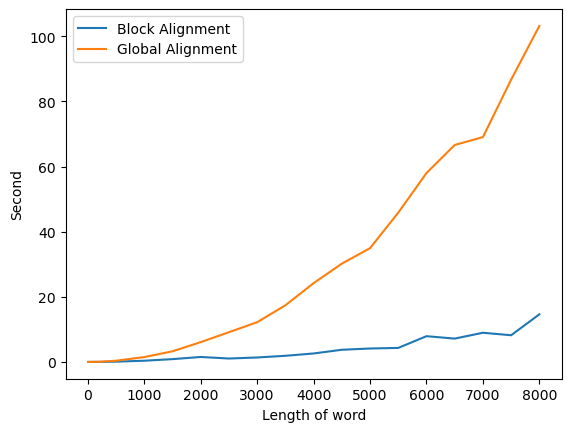

In [16]:
plt.plot(size_list, ba_time, label='Block Alignment')
plt.plot(size_list, ga_time, label='Global Alignment')
plt.legend()
plt.xlabel('Length of word')
plt.ylabel('Second')
plt.show()